In [20]:
# Simple Nyquist plotting
%matplotlib notebook
import control
import numpy as np
import matplotlib.pyplot as plt


## Create the plant model

$$P = \frac{1}{m} \left [ \frac{1}{s^2} + \frac{\phi}{s^2+2\zeta\omega_n+\omega_n^2} \right ]$$

<IPython.core.display.Javascript object>


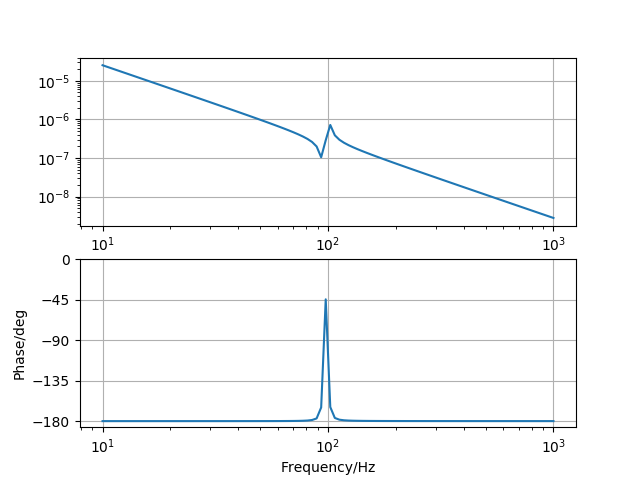

In [30]:
m = 10
phi = 0.1
omega_n = 2.0*np.pi*100
zeta = 0.01

P = 1/m*(control.tf(1,[1,0,0]) + control.tf(phi,[1,2.0*zeta*omega_n,omega_n**2]))
freq = np.logspace(1,3,100)
omega = 2.0*np.pi*freq
mag, phase, omega = control.freqresp(P, omega)
mag = np.squeeze(mag)
phase = 180.0 / np.pi*np.squeeze(phase)



fig=plt.figure()
ax = fig.add_subplot(2,1,1)
plt.loglog(freq,mag)
plt.grid(True)
ax = fig.add_subplot(2,1,2)
plt.semilogx(freq,phase)
ax.set_yticks(np.arange(-180,1,45))
plt.xlabel("Frequency/Hz")
plt.ylabel("Phase/deg")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


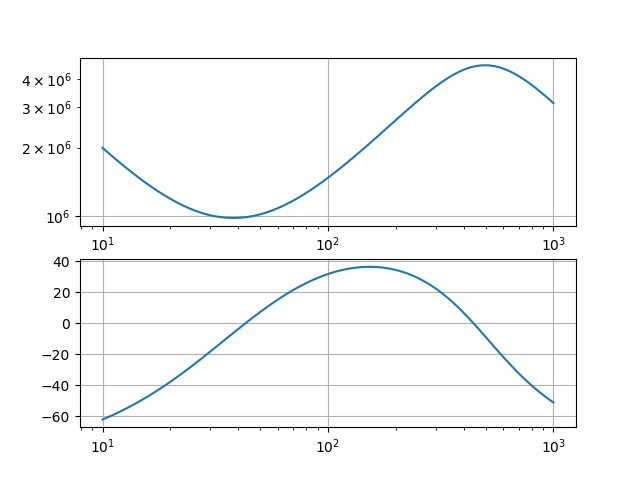

<IPython.core.display.Javascript object>


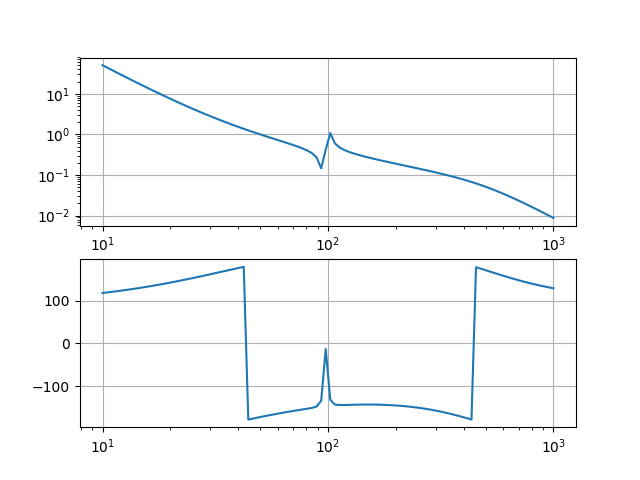

<IPython.core.display.Javascript object>


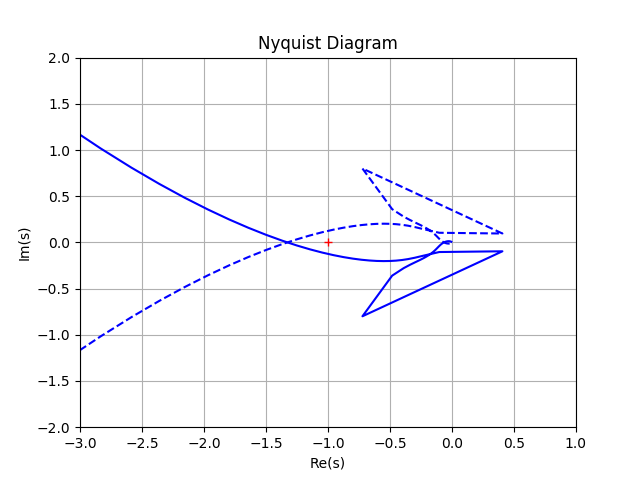

In [23]:
f_bw = 50
alpha = 1.2

f_D = f_bw / alpha
f_I = f_bw / (alpha**2)
f_lp = 10.0*f_bw
zeta_lp = np.sqrt(2)/2.0

C = control.tf([1,2.0*np.pi*f_D],2.0*np.pi*f_D)*control.tf([1,2.0*np.pi*f_I],[1,0])
C = C*control.tf((2.0*np.pi*f_lp)**2,[1,2.0*zeta_lp*2.0*np.pi*f_lp,(2.0*np.pi*f_lp)**2])

L = control.evalfr(P*C,(2.0*np.pi*f_bw)*1j)
C = (1/np.abs(L))*C
                   
magC, phaseC, omega = control.freqresp(C, omega)
magC = np.squeeze(magC)
phaseC = 180.0 / np.pi*np.squeeze(phaseC)

plt.figure()
plt.subplot(2,1,1)
plt.loglog(freq,magC)
plt.grid(True)
plt.subplot(2,1,2)
plt.semilogx(freq,phaseC)
plt.grid(True)
plt.show()

L = P*C
magL, phaseL, omega = control.freqresp(L, omega)
magL = np.squeeze(magL)
phaseL = 180.0 / np.pi*np.squeeze(phaseL)

plt.figure()
plt.subplot(2,1,1)
plt.loglog(freq,magL)
plt.grid(True)
plt.subplot(2,1,2)
plt.semilogx(freq,phaseL)
plt.grid(True)
plt.show()

plt.figure()
control.nyquist(L,omega)
plt.grid(True)
plt.xlim([-3,1])
plt.ylim([-2,2])
plt.title('Nyquist Diagram')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.show()